# Departamento médico

## Importação das bibliotecas e base de dados

In [1]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, AveragePooling2D, Dropout, Flatten


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = '/content/drive/MyDrive/Departamento médico/Dataset'

In [4]:
os.listdir(data_path)

['.DS_Store', '2', '3', '0', '1']

In [5]:
img_generator = ImageDataGenerator(rescale=1./255)

In [6]:
train_gen = img_generator.flow_from_directory(batch_size=40, directory=data_path,
                                              shuffle=True, target_size=(256,256),
                                              class_mode = 'categorical', subset='training')

Found 532 images belonging to 4 classes.


In [7]:
X_train, y_train = next(train_gen)

In [8]:
X_train.shape

(40, 256, 256, 3)

In [9]:
y_train

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]],

In [10]:
dct_labels = {0:'Covid-19', 1:'Normal', 2:'PneumoniaViral', 3:'PneumoniaBacterial'}

## Visualização dos dados

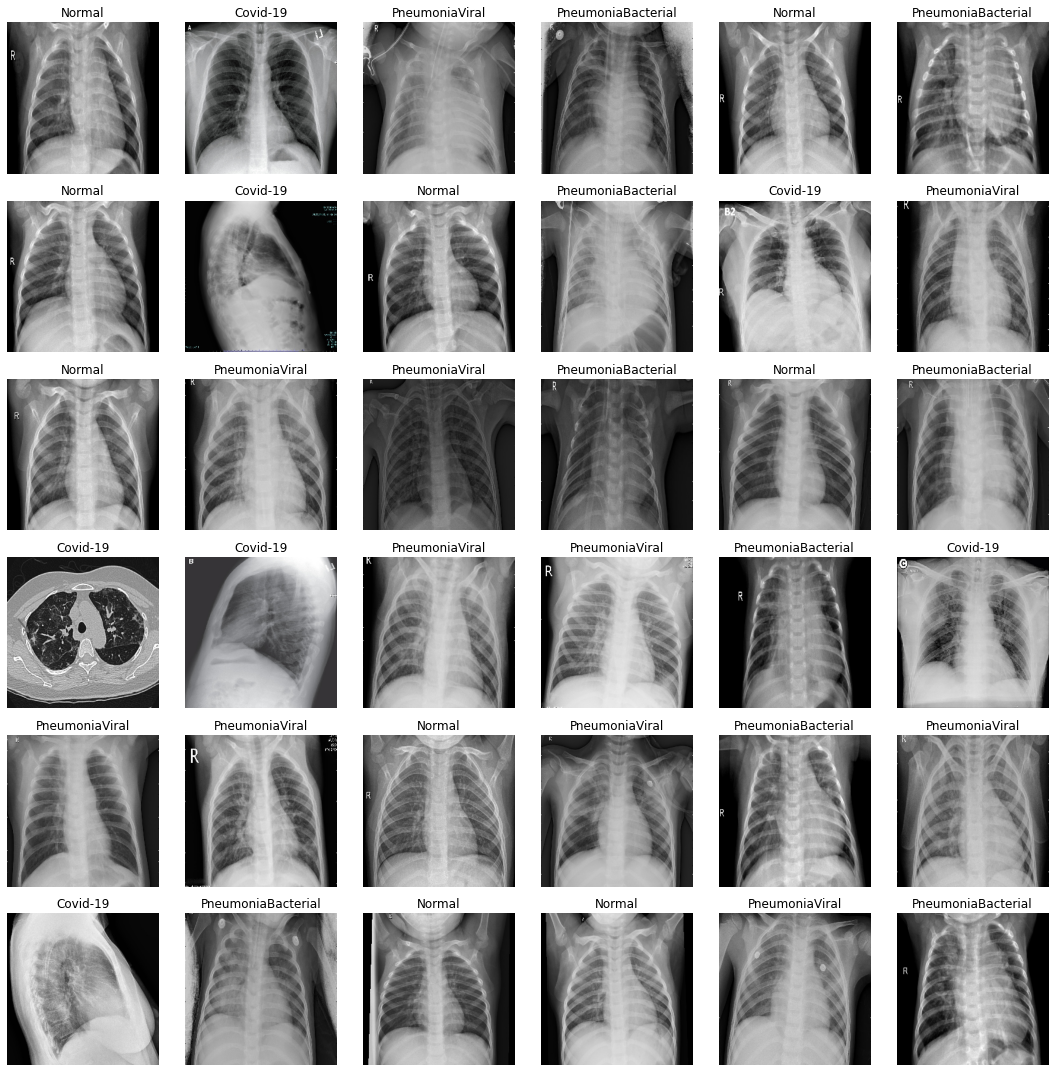

In [11]:
fig, ax = plt.subplots(6,6,figsize=(15,15))
ax = ax.ravel()
for i in range(0,36):
  ax[i].imshow(X_train[i])
  ax[i].set_title(dct_labels[np.argmax(y_train[i])])
  ax[i].axis('off')
plt.tight_layout()

## Carregamento da rede neural com pesos pré-treinados

In [12]:
base_model = ResNet50(weights='imagenet', include_top=False,
                      input_tensor=Input(shape=(256,256,3)))

In [13]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [14]:
len(base_model.layers)

175

In [15]:
for layer in base_model.layers[:-10]:
  layers.trainable = False

## Construção e treinamento do modelo deep learning

In [16]:
head_model = base_model.output
head_model = AveragePooling2D()(head_model)
head_model = Flatten()(head_model)
head_model = Dense(256, activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(256, activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(4, activation='softmax')(head_model)

In [17]:
model = Model(inputs=base_model.input, outputs=head_model)

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4,decay=1e-6),
              metrics=['accuracy'])

In [19]:
chk_pointer = ModelCheckpoint(filepath='weights.hdf5')

In [20]:
train_gen = img_generator.flow_from_directory(batch_size=4, directory=data_path,
                                              shuffle=True, target_size=(256,256),
                                              class_mode = 'categorical', subset='training')

Found 532 images belonging to 4 classes.


In [21]:
history = model.fit(train_gen, epochs=50, callbacks=[chk_pointer])

Epoch 1/50
133/133 [==============================] - 27s 109ms/step - loss: 1.2636 - accuracy: 0.6040
Epoch 2/50
133/133 [==============================] - 15s 109ms/step - loss: 0.3908 - accuracy: 0.9032
Epoch 3/50
133/133 [==============================] - 15s 109ms/step - loss: 0.3670 - accuracy: 0.8830
Epoch 4/50
133/133 [==============================] - 15s 109ms/step - loss: 0.2418 - accuracy: 0.9432
Epoch 5/50
133/133 [==============================] - 14s 108ms/step - loss: 0.2421 - accuracy: 0.9301
Epoch 6/50
133/133 [==============================] - 15s 109ms/step - loss: 0.0283 - accuracy: 0.9865
Epoch 7/50
133/133 [==============================] - 15s 110ms/step - loss: 0.3361 - accuracy: 0.9471
Epoch 8/50
133/133 [==============================] - 15s 110ms/step - loss: 0.0934 - accuracy: 0.9860
Epoch 9/50
133/133 [==============================] - 14s 109ms/step - loss: 0.1427 - accuracy: 0.9757
Epoch 10/50
133/133 [==============================] - 15s 109ms/step - l

## Avaliação da rede neural

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

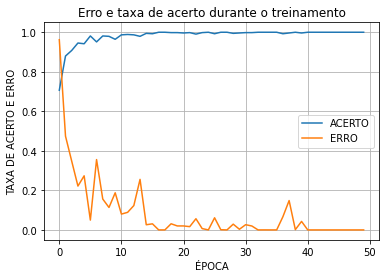

In [24]:
plt.plot(history.history['accuracy'],label='ACERTO')
plt.plot(history.history['loss'],label='ERRO')
plt.title('Erro e taxa de acerto durante o treinamento')
plt.xlabel('ÉPOCA')
plt.ylabel('TAXA DE ACERTO E ERRO')
plt.legend()
plt.grid();

In [25]:
test_path = '/content/drive/MyDrive/Departamento médico/Test'

In [26]:
os.listdir(test_path)

['3', '1', '2', '0']

In [27]:
test_gen = ImageDataGenerator(rescale=1./255)
test_gen = test_gen.flow_from_directory(batch_size=40, directory=test_path,
                                        shuffle=True, target_size=(256,256),
                                        class_mode='categorical')

Found 40 images belonging to 4 classes.


In [29]:
eval = model.evaluate(test_gen)

1/1 [==============================] - 1s 905ms/step - loss: 5.5595 - accuracy: 0.7250


In [30]:
eval

[5.559511184692383, 0.7250000238418579]

In [31]:
prediction = []
original = []
image = []
for i in range(len(os.listdir(test_path))):
  for item in os.listdir(os.path.join(test_path, str(i))):
    img = cv2.imread(os.path.join(test_path, str(i), item))
    img = cv2.resize(img, (256,256))
    image.append(img)
    img = img / 255
    img = img.reshape(-1,256,256,3)

    predict = model.predict(img)
    predict = np.argmax(predict)
    prediction.append(predict)
    original.append(i)

In [32]:
print(prediction)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 3, 1, 1, 2, 2, 2, 1, 3, 3, 3, 3, 1, 3, 2, 3, 1]


In [33]:
print(original)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [35]:
accuracy_score(original, prediction)

0.75

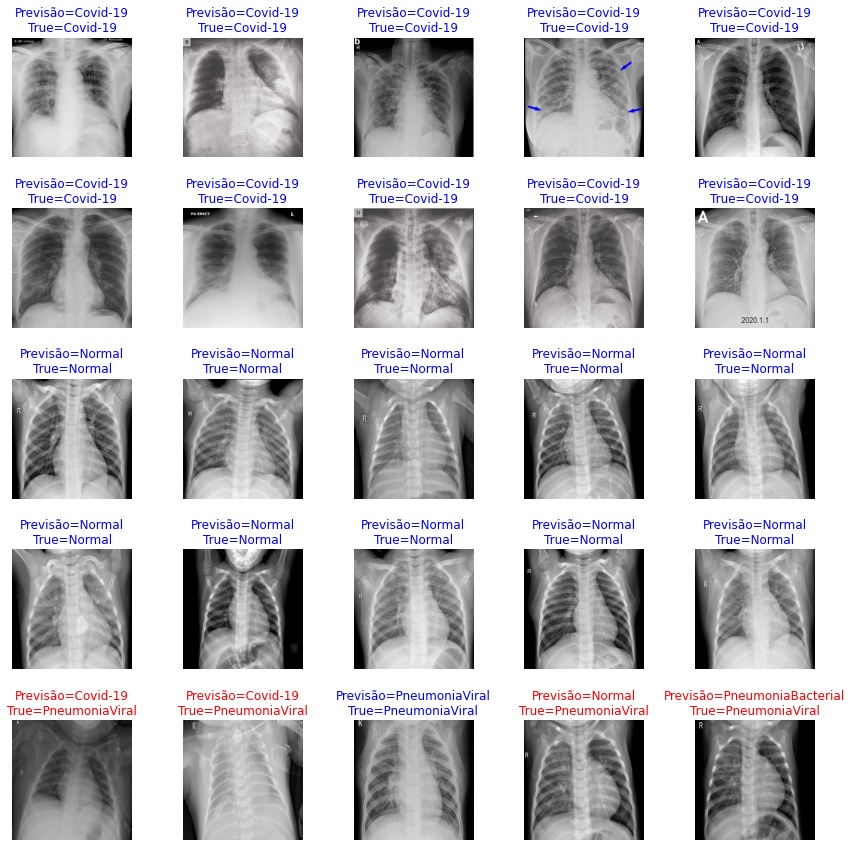

In [39]:
fig, ax = plt.subplots(5,5,figsize=(12,12))
ax = ax.ravel()
for i in np.arange(0,25):
  ax[i].imshow(image[i])
  cor = 'b' if prediction[i] == original[i] else 'r'
  ax[i].set_title('Previsão={}\nTrue={}'\
                  .format(str(dct_labels[prediction[i]]), str(dct_labels[original[i]])), color=cor)
  ax[i].axis('off')
plt.tight_layout();

In [41]:
dct_labels

{0: 'Covid-19', 1: 'Normal', 2: 'PneumoniaViral', 3: 'PneumoniaBacterial'}

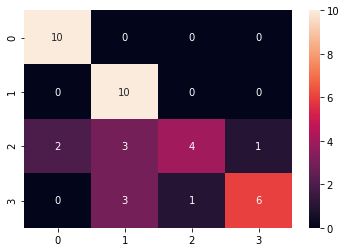

In [40]:
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot=True);

In [42]:
print(classification_report(original, prediction))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.62      1.00      0.77        10
           2       0.80      0.40      0.53        10
           3       0.86      0.60      0.71        10

    accuracy                           0.75        40
   macro avg       0.78      0.75      0.73        40
weighted avg       0.78      0.75      0.73        40



## Classificação de somente uma imagem

In [43]:
from keras.models import load_model
model_loaded = load_model('/content/weights.hdf5')
model_loaded.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [44]:
img = cv2.imread('/content/drive/MyDrive/Departamento médico/Test/0/radiol.2020200490.fig3.jpeg')
img

array([[[192, 192, 192],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [134, 134, 134]],

       [[192, 192, 192],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [134, 134, 134]],

       [[192, 192, 192],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [134, 134, 134]],

       ...,

       [[196, 196, 196],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  3,   3,   3],
        [134, 134, 134]],

       [[187, 187, 187],
        [  5,   5,   5],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  7,   7,   7],
        [129, 129, 129]],

       [[214, 214, 214],
        [ 80,  80,  80],
        [ 87,  87,  87],
        ...,
        [ 80,  80,  80],
        [ 84,  84,  84],
        [181, 181, 181]]

In [45]:
img.shape

(1343, 1300, 3)

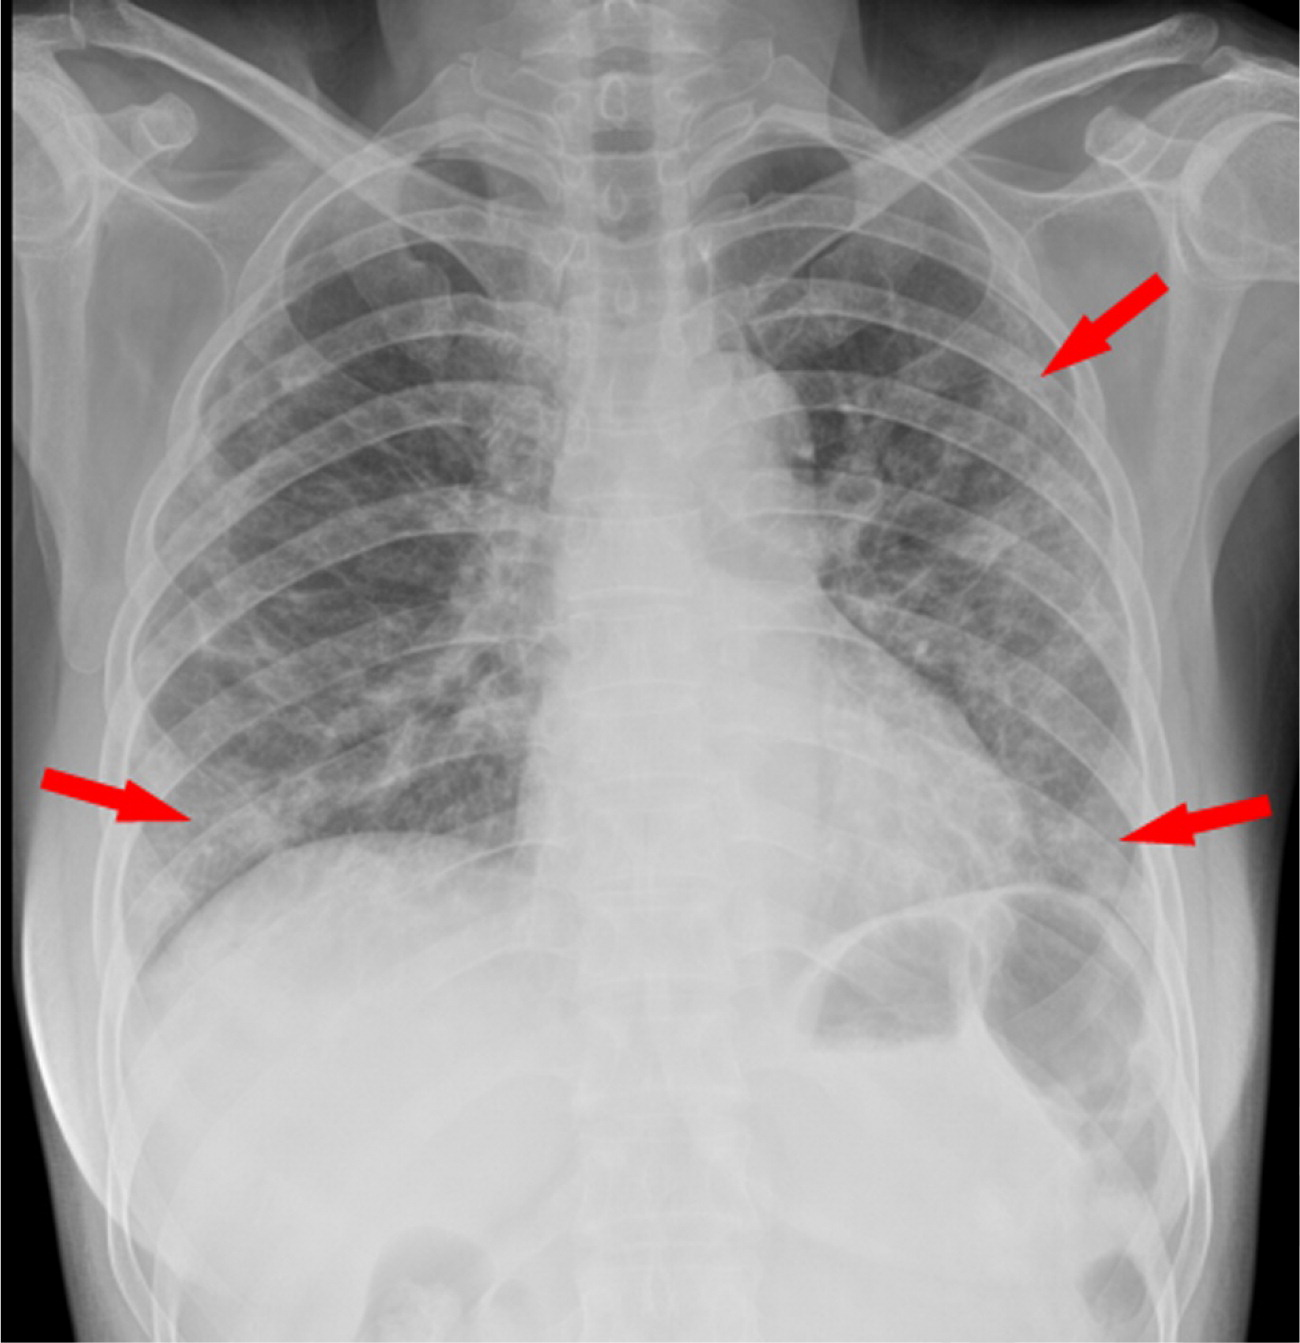

In [47]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

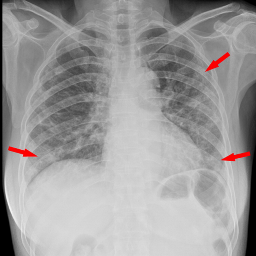

In [48]:
img = cv2.resize(img, (256,256))
cv2_imshow(img)

In [49]:
img = img / 255
img

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.10980392, 0.10980392, 0.10980392],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.12941176, 0.12941176, 0.12941176],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.16470588, 0.16470588, 0.16470588],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [50]:
img.shape

(256, 256, 3)

In [51]:
img = img.reshape(-1,256,256,3)
img.shape

(1, 256, 256, 3)

In [91]:
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})

In [92]:
predict = model_loaded(img)
predict

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.999996, 0.000004, 0.000000, 0.000000]], dtype=float32)>

In [93]:
predict_idx = np.argmax(predict)
predict_idx

0

In [94]:
dct_labels[predict_idx], predict[0][predict_idx:]

('Covid-19',
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.999996, 0.000004, 0.000000, 0.000000], dtype=float32)>)

In [95]:
for i, prob in enumerate(predict[0]):
  print(dct_labels[i],' = ', prob.numpy())

Covid-19  =  0.9999964
Normal  =  3.5555877e-06
PneumoniaViral  =  1.0744543e-13
PneumoniaBacterial  =  0.0
